https://thebook.io/080324/part04/ch11/02/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


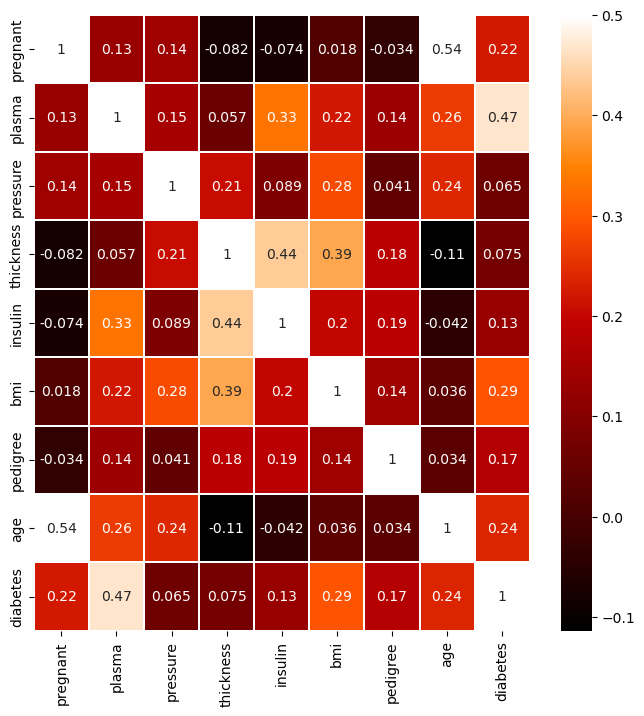

In [6]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

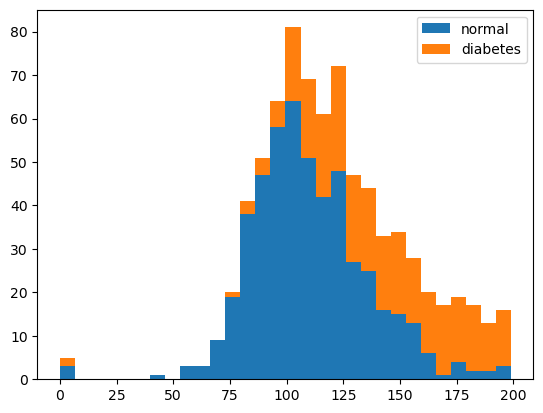

In [7]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

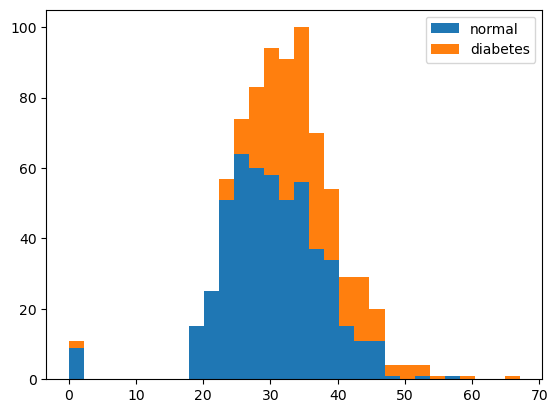

In [8]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

In [9]:
from tensorflow.keras import models, layers

In [10]:
X = df.iloc[:, :8] # 세부 정보를 X로 지정합니다.
y = df.iloc[:, 8] # 당뇨병 여부를 y로 지정합니다.

In [11]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
print(type(y))

<class 'pandas.core.series.Series'>


In [13]:
X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64


In [17]:
model = models.Sequential()
model.add(layers.Dense(12, input_dim=8, activation='relu', name='input_layer')) #레이어에 이름 부여 가능
model.add(layers.Dense(8, activation='relu', name='hidden_layer'))
model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

8x12 = 96 + 12 = 108  
12x8 = 96 + 8 = 104  
8x1 = 8 + 1 = 9  
∴221

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 12)                108       
                                                                 
 hidden_layer (Dense)        (None, 8)                 104       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 2.2542 - accuracy: 0.5859
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8328 - accuracy: 0.6380
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.6497
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6497
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6549
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.6549
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6549
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6549
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.6562
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6357 - accura

여러번 해서 평균 정확도를 측정해야함 (선택된 데이터에 따라 정확도가 다르게 나올 수 있기때문)